In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lunch/train.csv')
df_train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lunch/test.csv')
df_test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [4]:
import seaborn as sns

In [5]:
# 基本統計量
print(df_train.describe())
print(df_test.describe())

                y     soldout        kcal  payday  temperature
count  207.000000  207.000000  166.000000    10.0   207.000000
mean    86.623188    0.449275  404.409639     1.0    19.252174
std     32.882448    0.498626   29.884641     0.0     8.611365
min     29.000000    0.000000  315.000000     1.0     1.200000
25%     57.000000    0.000000  386.000000     1.0    11.550000
50%     78.000000    0.000000  408.500000     1.0    19.800000
75%    113.000000    1.000000  426.000000     1.0    26.100000
max    171.000000    1.000000  462.000000     1.0    34.600000
         soldout        kcal  payday  temperature
count  40.000000   36.000000     2.0    40.000000
mean    0.425000  421.083333     1.0    18.665000
std     0.500641   13.626392     0.0     4.401838
min     0.000000  396.000000     1.0     9.200000
25%     0.000000  411.500000     1.0    15.250000
50%     0.000000  420.000000     1.0    19.000000
75%     1.000000  428.500000     1.0    21.650000
max     1.000000  460.000000     

In [6]:
print(df_train.shape)
print(df_test.shape)

(207, 12)
(40, 11)


In [8]:
# 欠損
df_train.isnull().sum()

,0
datetime,0
y,0
week,0
soldout,0
name,0
kcal,41
remarks,186
event,193
payday,197
weather,0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

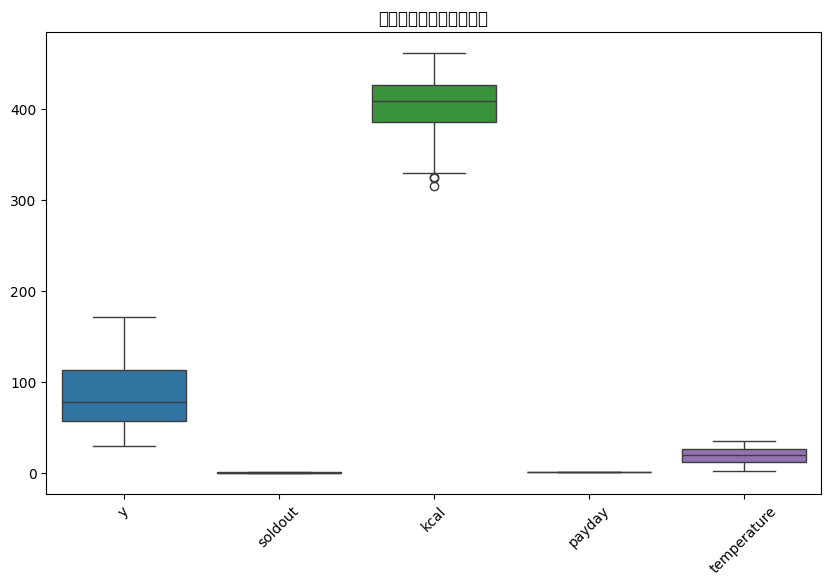

In [9]:
# 数値データの外れ値を確認する箱ひげ図
num_cols = df_train.select_dtypes(include=["number"]).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train[num_cols])
plt.title("数値データの外れ値確認")
plt.xticks(rotation=45)
plt.show()

In [10]:
# 外れ値をIQRで抽出する関数
def detect_outliers(df, cols):
    outlier_dict = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # 外れ値に該当するデータ
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        outlier_dict[col] = {
            "件数": outliers.shape[0],
            "外れ値リスト": outliers.values
        }
    return outlier_dict

# 数値列を対象に外れ値確認
num_cols = df_train.select_dtypes(include=["number"]).columns
outlier_results = detect_outliers(df_train, num_cols)

# 結果表示
for col, info in outlier_results.items():
    print(f"特徴量: {col}")
    print(f"  外れ値件数: {info['件数']}")
    print(f"  外れ値リスト: {info['外れ値リスト'][:20]} ...")  # 多い場合は先頭20件だけ表示
    print("-" * 40)

特徴量: y
  外れ値件数: 0
  外れ値リスト: [] ...
----------------------------------------
特徴量: soldout
  外れ値件数: 0
  外れ値リスト: [] ...
----------------------------------------
特徴量: kcal
  外れ値件数: 3
  外れ値リスト: [315. 325. 324.] ...
----------------------------------------
特徴量: payday
  外れ値件数: 0
  外れ値リスト: [] ...
----------------------------------------
特徴量: temperature
  外れ値件数: 0
  外れ値リスト: [] ...
----------------------------------------


In [11]:
# 学習データの欠損値の補完
# 1. kcal → 中央値で補完
if "kcal" in df_train.columns:
    median_kcal = df_train["kcal"].median()
    df_train["kcal"].fillna(median_kcal, inplace=True)

# 2. remarks → 使用しない（削除）
if "remarks" in df_train.columns:
    df_train.drop(columns=["remarks"], inplace=True)

# 3. event → 欠損は0、値があれば1
if "event" in df_train.columns:
    df_train["event"] = df_train["event"].notna().astype(int)

# 4. payday → 欠損は0
if "payday" in df_train.columns:
    df_train["payday"].fillna(0, inplace=True)

/tmp/ipython-input-1461079249.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["kcal"].fillna(median_kcal, inplace=True)
/tmp/ipython-input-1461079249.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [12]:
# テストデータの欠損値の補完
# kcal → 中央値補完（train の中央値を使う）
if "kcal" in df_test.columns:
    df_test["kcal"].fillna(median_kcal, inplace=True)

# remarks → 削除
if "remarks" in df_test.columns:
    df_test.drop(columns=["remarks"], inplace=True)

# event → 欠損は0、値があれば1
if "event" in df_test.columns:
    df_test["event"] = df_test["event"].notna().astype(int)

# payday → 欠損は0
if "payday" in df_test.columns:
    df_test["payday"].fillna(0, inplace=True)

/tmp/ipython-input-2712454853.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["kcal"].fillna(median_kcal, inplace=True)
/tmp/ipython-input-2712454853.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [13]:
df_train.head()
df_test.head()

,datetime,week,soldout,name,kcal,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,0,0.0,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,0,0.0,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,0,0.0,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,0,0.0,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,0,0.0,晴れ,--,22.1


In [14]:
# datetime を日付型に変換
df_train["datetime"] = pd.to_datetime(df_train["datetime"])
df_test["datetime"] = pd.to_datetime(df_test["datetime"])

# 月と曜日を特徴量化
for df in [df_train, df_test]:
    df["month"] = df["datetime"].dt.month
    df["dayofweek"] = df["datetime"].dt.dayofweek  # 0=月曜, 6=日曜

In [15]:
# 目的変数
y = df_train["y"]

# 説明変数（datetimeは除外してOK、代わりに month と dayofweek を使う）
X = df_train.drop(["y", "datetime"], axis=1)
X_test = df_test.drop(["datetime"], axis=1)

In [16]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [17]:
# categoryencoder
import category_encoders as ce
list_cols = ['week', 'name', 'weather', 'precipitation']
ce_ohe = ce.OneHotEncoder(cols=list_cols, handle_unknown='impute')

X_encoded = ce_ohe.fit_transform(X)
X_test_encoded = ce_ohe.transform(X_test)

print("学習データ shape:", X_encoded.shape)
print("テストデータ shape:", X_test_encoded.shape)

学習データ shape: (207, 183)
テストデータ shape: (40, 183)


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error

In [19]:
# 説明変数と目的変数に分割
X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [27]:
# スケーリング
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test_encoded)

In [28]:
# モデル学習（線形回帰）
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_lin = linreg.predict(X_valid_scaled)

rmse_lin = np.sqrt(mean_squared_error(y_valid, y_pred_lin))
print("Linear Regression RMSE:", rmse_lin)

# モデル学習（LASSO回帰）
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_valid_scaled)

rmse_lasso = np.sqrt(mean_squared_error(y_valid, y_pred_lasso))
print("LASSO Regression RMSE:", rmse_lasso)


Linear Regression RMSE: 33.20582479252608
LASSO Regression RMSE: 23.308021900457565


In [29]:
# NaN をゼロで補完
X_encoded = X_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)

In [31]:
# テストデータに対する予測
y_test_pred_lin = linreg.predict(X_test_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

print("Test Prediction (Linear):", y_test_pred_lin[:10])
print("Test Prediction (LASSO):", y_test_pred_lasso[:10])

Test Prediction (Linear): [ 84.03337337  67.807844    62.59207043 131.02287245  83.10343335
 104.3886688   82.22295335 134.18728692  72.20962365  77.71016025]
Test Prediction (LASSO): [ 81.19551433  73.92244074  60.91242691  91.51561452  87.03425534
  81.01700853  77.6884818  100.89734533  81.32263981 101.80836433]


In [32]:
# 予測結果の表示
pd.DataFrame({"y_test_pred_lin": y_test_pred_lin, "y_test_pred_lasso": y_test_pred_lasso}).head()

,y_test_pred_lin,y_test_pred_lasso
0,84.033373,81.195514
1,67.807844,73.922441
2,62.592070,60.912427
3,131.022872,91.515615
4,83.103433,87.034255


                 Linear Regression  LASSO Regression
Without Scaling          33.205825         23.308022
With Scaling             33.205825         23.308022


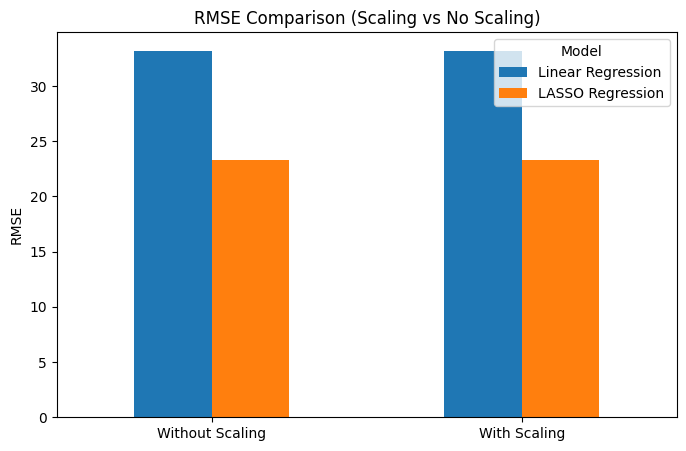

In [33]:
# RMSEの可視化
# 既に計算済みの RMSE をまとめる
results = {
    "Linear Regression": [rmse_lin],
    "LASSO Regression": [rmse_lasso]
}

df_results = pd.DataFrame(results, index=["Without Scaling", "With Scaling"])
print(df_results)

# 可視化（棒グラフ）
df_results.plot(kind="bar", figsize=(8, 5))
plt.title("RMSE Comparison (Scaling vs No Scaling)")
plt.ylabel("RMSE")
plt.xticks(rotation=0)
plt.legend(title="Model")
plt.show()

In [35]:
# datetime列を変換（yyyy-m-d形式にする）
dates = pd.to_datetime(df_test["datetime"]).dt.strftime("%Y-%-m-%-d")

# 提出用データフレーム作成
submission = pd.DataFrame({
    0: dates,
    1: y_test_pred_lasso  # 予測値（スケーリング後のLASSO予測を例に使用）
})

# ヘッダーなしでCSV保存
submission.to_csv("submission.csv", index=False, header=False)